# AKTI - Hugging Face

Hugging Face je otevřená platforma a komunita, která se rychle stala centrem pro výzkum a nasazení moderních modelů hlubokého učení (Deep Learning), zejména v oblasti zpracování přirozeného jazyka (NLP), ale nyní i počítačového vidění.

Jádrem platformy je knihovna transformers, která poskytuje rozsáhlý katalog předtrénovaných modelů state-of-the-art (jako jsou BERT, GPT, ViT, Diffusion Models) a umožňuje jejich snadné stahování, úpravu a spouštění pomocí frameworků PyTorch a TensorFlow.

Hugging Face usnadňuje vědcům a inženýrům sdílení modelů, datasetů a demoverzí, čímž výrazně urychluje přechod od akademického výzkumu k praktickým aplikacím.


Cílem této části je ukázat sílu předtrénovaných modelů. Použijeme knihovnu transformers k načtení modelu, který byl trénován na milionech obrázků (ImageNet), a ukážeme jeho schopnost rozpoznávat objekty.

## Krok 1: Instalace a importy

Prvním krokem je instalace knihovny transformers a načtení potřebných modulů pro práci s obrázky.

In [32]:
!pip install transformers Pillow requests

import torch
from transformers import ViTForImageClassification, ViTImageProcessor
from PIL import Image
import requests
import matplotlib.pyplot as plt

### Proč se importuje co
- **torch** - protože modely z knihovny **transformers** (včetně ViT) jsou implementovány a spouštěny pomocí tenzorů a výpočetního grafu PyTorch.
- **transformers** - to je hlavní knihovna HF, která poskytuje: 
  + *ViTForImageClassification* -- třída obsahující architekturu Vision Transformeru a váhy natrénované pro klasifikaci obrázků.
  + *ViTImageProcessor* - třída pro předzpracování vstupních obrázků (zajišťuje správnou velikost, normalizaci a formát tenzoru, který model ViT očekává).
- **PIL (Pillow)** - práce s obrázky
- **requests** - stahování Dat. Slouží k stažení obrázku, abychom mohli obrázek nahrát do PIL a následně do modelu ViT.

## Krok 2: Načtení předtrénovaného modelu (Vision Transformer)

In [23]:
# Načtení procesoru (Feature Extractor)
processor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224')

# Načtení modelu (váhy natrénované na ImageNet)
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

C:\Users\kony\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\kony\.cache\huggingface\hub\models--google--vit-base-patch16-224. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

## Krok 3: Zpracování a predikce


Model predikuje: tank, army tank, armored combat vehicle, armoured combat vehicle
------------------------------


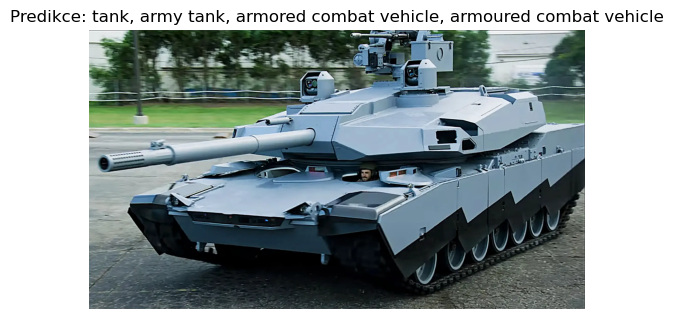

In [42]:
# Stáhnutí testovacího obrázku z URL
# url = "http://images.cocodataset.org/val2017/000000039769.jpg"
url = "https://d39-a.sdn.cz/d_39/c_img_gV_p/offDy/abramsx-gd.png"

image = Image.open(requests.get(url, stream=True).raw).convert("RGB")

# --- Předzpracování obrázku (Processor) ---
# Processor připraví obrázek na správnou velikost (224x224) a formát tensoru.
inputs = processor(images=image, return_tensors="pt")

# --- Dopředný Průchod a Predikce ---
with torch.no_grad():
    outputs = model(**inputs)

# Získání logitů a pravděpodobností
logits = outputs.logits
predicted_class_idx = logits.argmax(-1).item()

# Převod indexu na label (člověkem čitelný popis)
prediction = model.config.id2label[predicted_class_idx]

print(f"\nModel predikuje: {prediction}") 
print("-" * 30)

# Vizualizace pro wow efekt
plt.imshow(image)
plt.title(f"Predikce: {prediction}")
plt.axis('off')
plt.show()